In [1]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
number_of_images = []
#load images
def load_images_from_folder(folders):
    images = []
    count = 0
    for folder in folders:
        for filename in os.listdir(folder):
            img = cv2.imread(os.path.join(folder,filename))
            b,g,r = cv2.split(img)       # get b,g,r
            img = cv2.merge([r,g,b])     # switch it to rgb
            if img is not None:
                img = cv2.resize(img,(256,256))
                images.append(img)
                count = count + 1
        number_of_images.append(count) #นับว่าแต่ละ directory มีกี่รูป
        count = 0
    return images

In [3]:
folder_names = [
    './training/training/n0',
    './training/training/n1',
    './training/training/n2',
    './training/training/n3',
    './training/training/n4',
    './training/training/n5',
    './training/training/n6',
    './training/training/n7',
    './training/training/n8',
    './training/training/n9'
]
training_data = load_images_from_folder(folder_names)

In [4]:
#เตรียม output
def defined_output(number_of_images):
    label = []
    for count,num in enumerate(number_of_images):
        for i in range(num):
            classes = len(number_of_images)
            output = np.zeros((classes,), dtype=int)
            output[count] = 1
            label.append(output)
    return label

In [5]:
y = defined_output(number_of_images)
y = np.array(y)
print(y)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [6]:
number_of_images = []
folder_names = [
    './validation/validation/n0',
    './validation/validation/n1',
    './validation/validation/n2',
    './validation/validation/n3',
    './validation/validation/n4',
    './validation/validation/n5',
    './validation/validation/n6',
    './validation/validation/n7',
    './validation/validation/n8',
    './validation/validation/n9'
]
validation_data = load_images_from_folder(folder_names)

In [7]:
y_val = defined_output(number_of_images)
y_val = np.array(y_val)
print(y_val)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 1]]


In [8]:
training_data = np.array(training_data) / 255.0
validation_data = np.array(validation_data) / 255.0

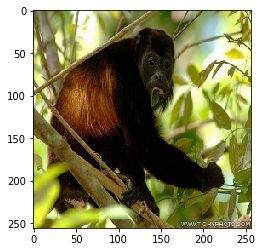

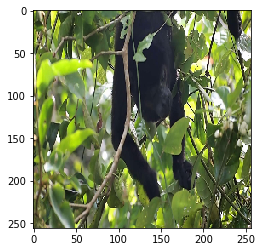

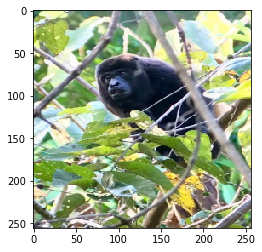

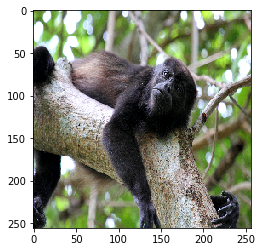

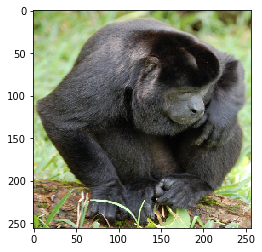

In [9]:
for i in range(5):
    plt.figure()
    plt.imshow(training_data[i])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data, y, test_size=0.3, random_state=42)

In [11]:
from tensorflow.keras.models import Sequential

INPUT_SHAPE = (256,256,3)

model = Sequential()
model.add(tf.keras.layers.Conv2D(16,3,activation='relu',input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32,3,activation='relu',input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64,3,activation='relu',input_shape=INPUT_SHAPE))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [12]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 57600)             0

In [14]:
history = model.fit(X_train,y_train,validation_data=(validation_data,y_val),epochs=10)

Epoch 1/10
24/24 [==============================] - 20s 853ms/step - loss: 2.2846 - accuracy: 0.1263 - val_loss: 2.2353 - val_accuracy: 0.1838
Epoch 2/10
24/24 [==============================] - 18s 765ms/step - loss: 2.1548 - accuracy: 0.1992 - val_loss: 2.0928 - val_accuracy: 0.2132
Epoch 3/10
24/24 [==============================] - 18s 764ms/step - loss: 1.9864 - accuracy: 0.3034 - val_loss: 2.0155 - val_accuracy: 0.2941
Epoch 4/10
24/24 [==============================] - 19s 775ms/step - loss: 1.8077 - accuracy: 0.4102 - val_loss: 1.8397 - val_accuracy: 0.3419
Epoch 5/10
24/24 [==============================] - 18s 771ms/step - loss: 1.6025 - accuracy: 0.5378 - val_loss: 1.7078 - val_accuracy: 0.3787
Epoch 6/10
24/24 [==============================] - 19s 774ms/step - loss: 1.3709 - accuracy: 0.6237 - val_loss: 1.6462 - val_accuracy: 0.4265
Epoch 7/10
24/24 [==============================] - 18s 758ms/step - loss: 1.1772 - accuracy: 0.6589 - val_loss: 1.5911 - val_accuracy: 0.4191

In [15]:
model.evaluate(X_test,y_test)

11/11 [==============================] - 2s 172ms/step - loss: 1.3240 - accuracy: 0.5333


[1.323962688446045, 0.5333333611488342]

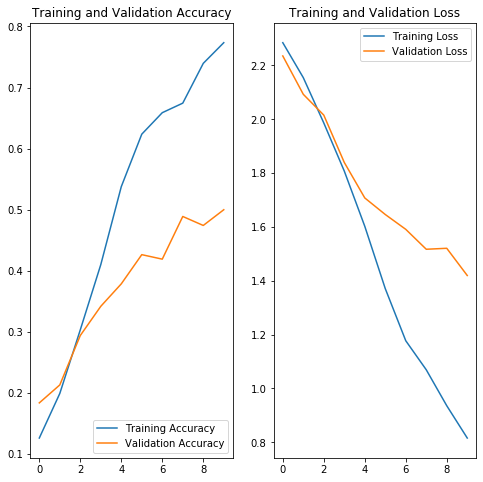

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
y_pred = model.predict(X_test)

In [18]:
from sklearn.metrics import f1_score

In [19]:
new_y_pred = []
for i in y_pred:
    new_y_pred.append(np.argmax(i))

new_y_test = []
for i in y_test:
    new_y_test.append(np.argmax(i))

In [20]:
f1_score(new_y_test,new_y_pred, average='micro')

0.5333333333333333

In [21]:
from sklearn.metrics import classification_report

print(classification_report(new_y_test,new_y_pred))

              precision    recall  f1-score   support

           0       0.52      0.46      0.48        35
           1       0.57      0.50      0.53        26
           2       0.82      0.38      0.52        37
           3       0.67      0.54      0.59        41
           4       0.53      0.70      0.60        37
           5       0.40      0.61      0.48        31
           6       0.60      0.72      0.65        39
           7       0.52      0.38      0.44        32
           8       0.52      0.39      0.45        28
           9       0.39      0.62      0.48        24

    accuracy                           0.53       330
   macro avg       0.55      0.53      0.52       330
weighted avg       0.57      0.53      0.53       330

